<a href="https://colab.research.google.com/github/surajun/ai-course-builder/blob/main/fakeproject0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install any necessary libraries
!pip install matplotlib seaborn tensorflow opencv-python


In [ ]:
# Install gdown (only needed once)
!pip install -U gdown

# Define the file ID and filename
file_id = "1oi-dFdf-MjOpyz1A4mht-NeJo5gWjKbJ"
zip_filename = "CelebDF.zip"

# Only download if file doesn't already exist
import os
if not os.path.exists(zip_filename):
    !gdown --id $file_id -O $zip_filename
else:
    print(f"{zip_filename} already exists. Skipping download.")

# Unzip the dataset
!unzip -q $zip_filename

# Confirm unzip
print("✅ Dataset unzipped successfully.")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1oi-dFdf-MjOpyz1A4mht-NeJo5gWjKbJ
From (redirected): https://drive.google.com/uc?id=1oi-dFdf-MjOpyz1A4mht-NeJo5gWjKbJ&confirm=t&uuid=1278bfa0-2cb5-45be-9cfa-18075e65d09b
To: /content/CelebDF.zip
100% 1.57G/1.57G [00:26<00:00, 59.3MB/s]
✅ Dataset unzipped successfully.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [ ]:
import os

print("Folders in /content/:", os.listdir('/content/'))


Folders in /content/: ['.config', 'Celeb_V2', 'drive', 'WhatsApp Image 2022-12-22 at 22.05.33.jpg', 'CelebDF.zip', 'sample_data']


In [ ]:
import os

# Correct dataset path based on your output
dataset_path = '/content/Celeb_V2'

# Show contents of the dataset folder
print("Contents of dataset folder:", os.listdir(dataset_path))


Contents of dataset folder: ['Test', 'Val', 'Train']


In [ ]:
import os

# Your dataset path in Colab
dataset_path = '/content/Celeb_V2'

train_dir = os.path.join(dataset_path, 'train_set')
val_dir = os.path.join(dataset_path, 'val_set')
test_dir = os.path.join(dataset_path, 'test_set')

IMG_SIZE = (128, 128)  # Image size for CNN
BATCH_SIZE = 32

print(f"Train dir: {train_dir}")
print(f"Validation dir: {val_dir}")
print(f"Test dir: {test_dir}")


Train dir: /content/Celeb_V2/train_set
Validation dir: /content/Celeb_V2/val_set
Test dir: /content/Celeb_V2/test_set


In [ ]:
import os

print("Contents of /content:")
print(os.listdir('/content'))

print("\nContents of /content/Celeb_V2:")
print(os.listdir('/content/Celeb_V2'))


Contents of /content:
['.config', 'Celeb_V2', 'drive', 'WhatsApp Image 2022-12-22 at 22.05.33.jpg', 'CelebDF.zip', 'sample_data']

Contents of /content/Celeb_V2:
['Test', 'Val', 'Train']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/Celeb_V2/Train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    '/content/Celeb_V2/Val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    '/content/Celeb_V2/Test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 80824 images belonging to 2 classes.
Found 10104 images belonging to 2 classes.
Found 10103 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 114s 41ms/step - accuracy: 0.6418 - loss: 0.6143 - val_accuracy: 0.8131 - val_loss: 0.4000
Epoch 2/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 127s 38ms/step - accuracy: 0.8271 - loss: 0.3765 - val_accuracy: 0.8100 - val_loss: 0.4134
Epoch 3/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 100s 40ms/step - accuracy: 0.8848 - loss: 0.2698 - val_accuracy: 0.9073 - val_loss: 0.2265
Epoch 4/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 97s 38ms/step - accuracy: 0.9159 - loss: 0.2062 - val_accuracy: 0.9245 - val_loss: 0.1907
Epoch 5/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 99s 39ms/step - accuracy: 0.9319 - loss: 0.1689 - val_accuracy: 0.9327 - val_loss: 0.1740
Epoch 6/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 96s 38ms/step - accuracy: 0.9405 - loss: 0.1485 - val_accuracy: 0.9427 - val_loss: 0.1476
Epoch 7/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 142s 38ms/step - accuracy: 0.9518 - loss: 0.1217 - val_accuracy: 0.9522 - val_loss: 0.1389
Epoch 8/15
2526/2526 ━━━━━━━━━━━━━━━━━━━━ 96s 38ms/step - accuracy: 0.95

In [ ]:
model_save_path = "/content/deepfake_cnn_model.keras"
model.save(model_save_path)
print(f"Model saved at {model_save_path}")


Model saved at /content/deepfake_cnn_model.keras


In [ ]:
import json

with open("/content/training_history.json", "w") as f:
    json.dump(history.history, f)


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


316/316 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9742 - loss: 0.0714
Test Loss: 0.1409
Test Accuracy: 0.9520


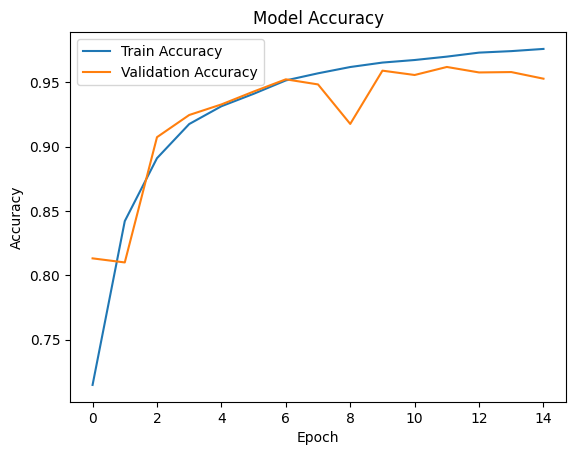

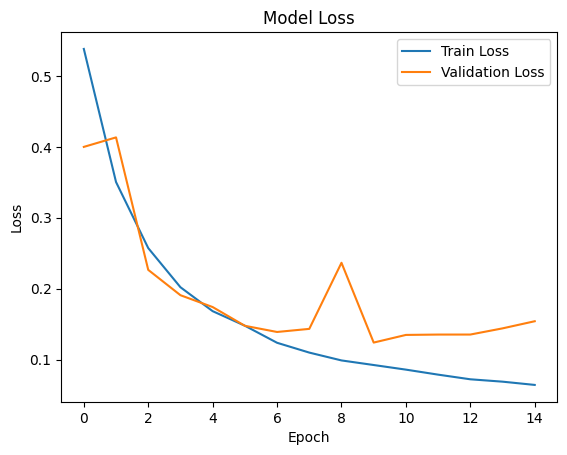

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


316/316 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step


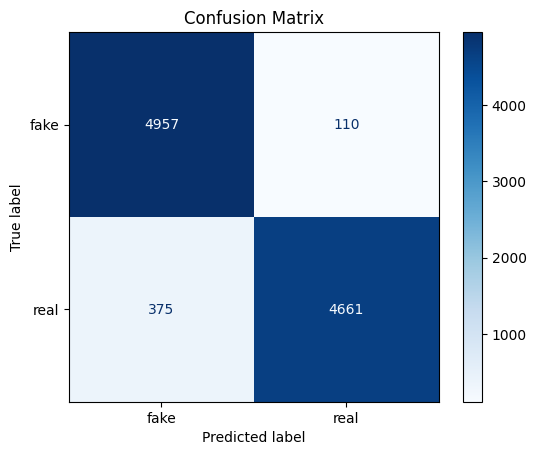

              precision    recall  f1-score   support

        fake       0.93      0.98      0.95      5067
        real       0.98      0.93      0.95      5036

    accuracy                           0.95     10103
   macro avg       0.95      0.95      0.95     10103
weighted avg       0.95      0.95      0.95     10103



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

preds = model.predict(test_generator)
y_pred = (preds > 0.5).astype(int).flatten()
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


In [ ]:
from google.colab import files
files.download("/content/deepfake_cnn_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.savefig("/content/accuracy_plot.png")
files.download("/content/accuracy_plot.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open("/content/training_history.json", "r") as f:
    history_data = json.load(f)

print(history_data['accuracy'])  # View training accuracy per epoch


[0.7148495316505432, 0.8420642614364624, 0.8909482359886169, 0.9174626469612122, 0.9312951564788818, 0.9409334063529968, 0.9513511061668396, 0.9568692445755005, 0.9617564082145691, 0.9652083516120911, 0.9672003388404846, 0.9698233008384705, 0.9729412198066711, 0.9741042256355286, 0.9758116602897644]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('/content/drive/MyDrive/deepfake_model.keras')
